In [10]:
!pip install plotly

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [105]:
df1=pd.read_csv("laptop_cleaned_dataset.csv")
df=df1.copy()

In [106]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [107]:
df.head()

,laptop_model,brand,price,num_votes,ratings,thickness,weight,warranty,screen_size,resolution_width,resolution_height,ppi,threads,ram,antiglare,aspect_ratio,touch_screen,cores,battery_capacity,battery_cell,hdmi,ethernet,multi_card_reader,thunderbolt,display_port,vga,backlit,fingerprint_sensor,inbuilt_microphone,usb2,usb3,typec,processor_gen,processor_brand,processor_model,graphics_brand,graphics_capacity,graphics_model,everyday_use,business,performance,gaming,hdd,ssd
0,Acer One 14 Z8-415 Laptop (11th Gen Core i3 / 8GB/ 512GB SSD/ Win11 Home),Acer,25990,1086.0,4.10,21.6,1.50,1.0,14.0,1920.0,1080.0,157,4.0,8,1,0,0,2.0,45.50,2.0,1,1,0,0,0,0,0,0,1,1.0,3.0,1.0,11.0,intel,i3,intel,NaN,Integrated,1,0,0,0,NaN,512.0
1,Wings Nuvobook V1 Laptop (11th Gen Core i5/ 8GB/ 512GB SSD/ Win11),Wings,34990,69.0,4.70,0.0,1.60,1.0,15.6,1080.0,1920.0,141,8.0,8,1,0,0,4.0,17.85,NaN,1,0,0,0,0,0,1,0,1,1.0,2.0,1.0,11.0,intel,i5,intel,NaN,Integrated,0,1,0,0,NaN,512.0
2,MSI Thin GF63 12HW-012IN Gaming Laptop (12th Gen Core i5/ 16GB/ 512GB SSD/ Win11 Home/ 4GB Graphics),MSI,49990,172.0,4.25,21.7,1.86,2.0,15.6,1920.0,1080.0,141,12.0,16,1,0,0,8.0,51.00,3.0,1,1,0,1,0,0,1,0,1,NaN,3.0,1.0,12.0,intel,i5,intel,4.0,Integrated,0,0,1,0,NaN,512.0
3,Acer Nitro V ANV15-51 Gaming Laptop (13th Gen Core i5/ 8GB/ 512GB SSD/ Win11/ 6GB Graph),Acer,79745,75.0,4.50,25.9,2.60,1.0,15.6,1920.0,1080.0,141,12.0,8,1,0,0,8.0,NaN,NaN,1,1,0,0,0,0,1,0,1,NaN,3.0,1.0,13.0,intel,i5,nvidia,6.0,rtx4050,0,0,0,1,NaN,512.0
4,Acer Aspire Lite AL15-51 Laptop (AMD Ryzen 5 5500U/ 16GB/ 512GB SSD/ Win11),Acer,35990,162.0,4.00,19.7,1.59,1.0,15.6,1920.0,1080.0,141,12.0,16,1,16:9,0,6.0,36.00,3.0,1,1,1,0,0,0,0,0,1,1.0,2.0,1.0,5.0,amd,5,intel,NaN,Integrated,0,0,1,0,NaN,512.0


In [108]:
df.describe()

,price,num_votes,ratings,thickness,weight,warranty,screen_size,resolution_width,resolution_height,ppi,threads,ram,antiglare,touch_screen,cores,battery_capacity,battery_cell,hdmi,ethernet,multi_card_reader,thunderbolt,display_port,vga,backlit,fingerprint_sensor,inbuilt_microphone,usb2,usb3,typec,processor_gen,graphics_capacity,everyday_use,business,performance,gaming,hdd,ssd
count,1020.000000,1020.000000,1020.000000,1020.000000,935.000000,1015.000000,1020.000000,1018.000000,1018.000000,1020.000000,998.000000,1020.000000,1020.000000,1020.000000,1015.000000,766.000000,818.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,297.000000,957.000000,960.000000,965.000000,413.000000,1020.000000,1020.000000,1020.000000,1020.000000,21.000000,1020.000000
mean,86099.358824,261.059804,4.338480,20.544265,1.818432,1.134975,15.194667,2033.392927,1218.049116,158.972549,12.466934,13.878431,0.836275,0.090196,8.186207,57.361684,3.413203,0.942157,0.427451,0.299020,0.271569,0.019608,0.003922,0.800000,0.320588,0.987255,1.208754,1.908046,1.371875,10.339896,5.932203,0.253922,0.076471,0.448039,0.213725,796.952381,608.627451
std,67157.600006,990.637790,0.232508,36.830818,0.420556,0.374888,0.957497,439.991978,335.543167,37.940934,5.249484,6.927136,0.370208,0.286603,4.056286,17.694374,0.876971,0.233561,0.494951,0.458053,0.444987,0.138716,0.062530,0.400196,0.466932,0.112227,0.407104,0.623719,0.555793,2.954446,2.719090,0.435467,0.265880,0.497537,0.410136,416.480309,308.447985
min,11990.000000,51.000000,3.550000,0.000000,0.794000,1.000000,11.600000,1080.000000,768.000000,100.000000,2.000000,4.000000,0.000000,0.000000,2.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000
25%,47990.000000,72.000000,4.150000,14.800000,1.530000,1.000000,14.000000,1920.000000,1080.000000,141.000000,8.000000,8.000000,1.000000,0.000000,6.000000,45.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,7.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1024.000000,512.000000
50%,66074.500000,92.000000,4.300000,18.400000,1.730000,1.000000,15.600000,1920.000000,1080.000000,141.000000,12.000000,16.000000,1.000000,0.000000,8.000000,52.500000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,12.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1024.000000,512.000000
75%,95790.000000,114.250000,4.550000,20.000000,2.100000,1.000000,15.600000,1920.000000,1200.000000,157.000000,16.000000,16.000000,1.000000,0.000000,10.000000,70.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,13.000000,8.000000,1.000000,0.000000,1.000000,0.000000,1024.000000,512.000000
max,569990.000000,14917.000000,4.750000,376.170000,3.860000,3.000000,18.000000,3840.000000,2560.000000,323.000000,32.000000,64.000000,1.000000,1.000000,24.000000,100.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,13.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1024.000000,4096.000000


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   laptop_model        1020 non-null   object 
 1   brand               1020 non-null   object 
 2   price               1020 non-null   int64  
 3   num_votes           1020 non-null   float64
 4   ratings             1020 non-null   float64
 5   thickness           1020 non-null   float64
 6   weight              935 non-null    float64
 7   warranty            1015 non-null   float64
 8   screen_size         1020 non-null   float64
 9   resolution_width    1018 non-null   float64
 10  resolution_height   1018 non-null   float64
 11  ppi                 1020 non-null   int64  
 12  threads             998 non-null    float64
 13  ram                 1020 non-null   int64  
 14  antiglare           1020 non-null   int64  
 15  aspect_ratio        1020 non-null   object 
 16  touch_

In [110]:
df.duplicated().sum()

222

In [111]:
df.drop_duplicates(inplace=True)

In [112]:
df.shape

(798, 44)

## Column Types
- **Numerical**-"price","num_votes","ratings","thickness","weight","screen_size","resolution_width","resolution_height","ppi","threads","ram","cores","battery_capacity","battery_cell",
- **Categorical**-"brand","warranty","antiglare","aspect_ratio","touch_screen","hdmi","ethernet","multi_card_reader","thunderbolt","display_port","vga","backlit","fingerprint_sensor","inbuilt_microphone","usb2","usb3","typec","processor_gen",'processor_brand', 'processor_model', 'graphics_brand','graphics_capacity', 'graphics_model', 'everyday_use', 'business','performance', 'gaming', 'hdd', 'ssd'
- **Mixed**-"laptop_model"

# 1.Brand

In [113]:
fig=px.bar(df,x="brand")
fig.show()

In [114]:
top_10_brands = df["brand"].value_counts().head(10)
cumulative_sum = top_10_brands.cumsum().iloc[-1]
market_share=cumulative_sum/len(df["brand"])*100
print(market_share)

94.3609022556391


## Conclusion
- Asus has the maximum number of laptop models.
- Top 10 brands are ['Asus', 'HP', 'Lenovo', 'MSI', 'Dell', 'Acer', 'Infinix', 'Samsung','Apple', 'LG']
- Top 10 brands has approx 94% models in the market

# 2.Price

In [115]:
# Create subplots
price_fig = make_subplots(rows=2, cols=1)

# Add histogram trace to the first subplot
price_fig.add_trace(
    go.Histogram(x=df["price"], nbinsx=100),
    row=1, col=1
)

# Add violin trace to the second subplot
price_fig.add_trace(
    go.Violin(x=df["price"]),
    row=2, col=1
)

# Update layout
price_fig.update_layout(title="Price Subplot")

# Show figure
price_fig.show()


## Conclusion
- Most of the laptops are fall in 60k-70k range.
- According to violin plot there are 71 outliers and after examining all the values i think these values are correct.

# 3. Number Of Votes

In [116]:
# Create subplots
votes_fig = make_subplots(rows=2, cols=1)

# Add histogram trace to the first subplot
votes_fig.add_trace(
    go.Histogram(x=df["num_votes"], nbinsx=100),
    row=1, col=1
)

# Add violin trace to the second subplot
votes_fig.add_trace(
    go.Violin(x=df["num_votes"]),
    row=2, col=1
)

# Update layout
votes_fig.update_layout(title="Number Of Votes Subplot")

# Show figure
votes_fig.show()

In [117]:
# We can use this column to find the popularity of the product.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[["num_votes"]])

In [118]:
#Here we use k-means clustering to check how many categories can be formed.
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

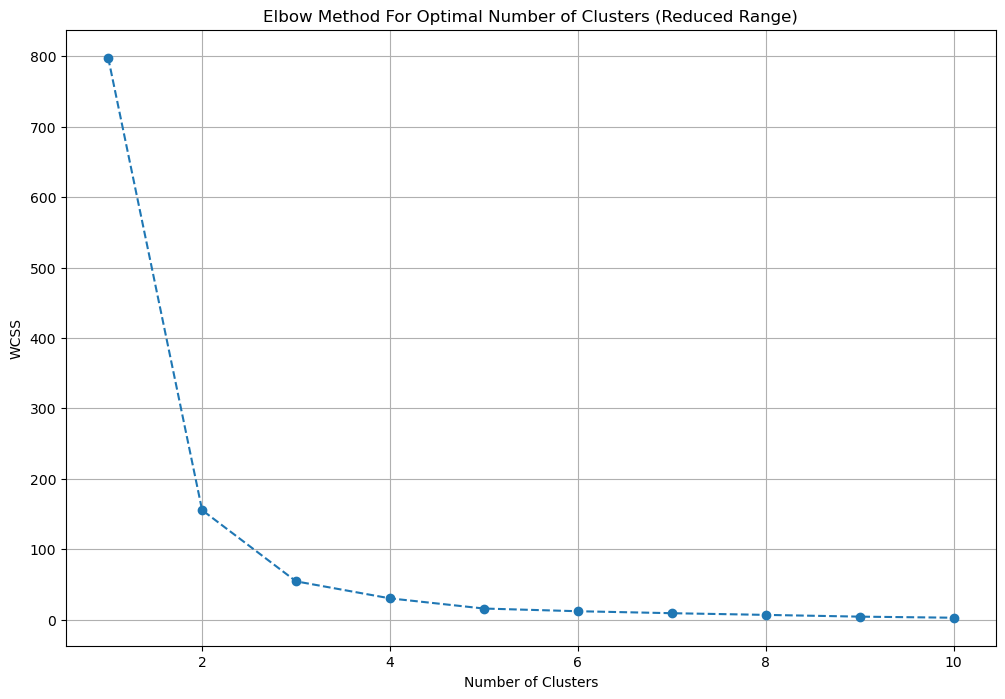

In [119]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [120]:
#there are multiple breaks in the slope so there is no clear cut definition of how many categories should be formed but i still try to divide it in 3 categories.
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [121]:
df['votes_type'] = cluster_assignments

In [122]:
df.sample(5)[["num_votes","votes_type"]]
# I don't think that these categories are useful

,num_votes,votes_type
601,65.0,0
641,74.0,0
376,85.0,0
96,91.0,0
896,90.0,0


In [123]:
#On the basis of histogram i think we can divide this in 3 categories
#0->regular[0-199]
#1->popular[199-2000]
#2->viral[2000<]
# Define the thresholds
regular_threshold = 200
popular_threshold = 2000

# Create a new column to store the popularity level
df['popularity'] = pd.cut(df['num_votes'], bins=[-1, regular_threshold, popular_threshold, float('inf')], labels=['regular', 'popular', 'viral'])


## Conclusion
- This is a numerical value 75% values of which are below 200 , so i converted this column into categorical column , Now we can use this feature to recommend laptops to the user.

# 4.Ratings


In [124]:
rating_fig=make_subplots(rows=2,cols=1)
rating_fig.add_trace(
    go.Histogram(x=df["ratings"],nbinsx=10),
    row=1,col=1
)
rating_fig.add_trace(
    go.Violin(x=df["ratings"]),
    row=2,col=1
)
rating_fig.update_layout(title="Ratings Subplot")
rating_fig.show()

In [125]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df[["ratings"]])

In [126]:
#Here we use k-means clustering to check how many categories can be formed.
wcss_reduced = []

for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

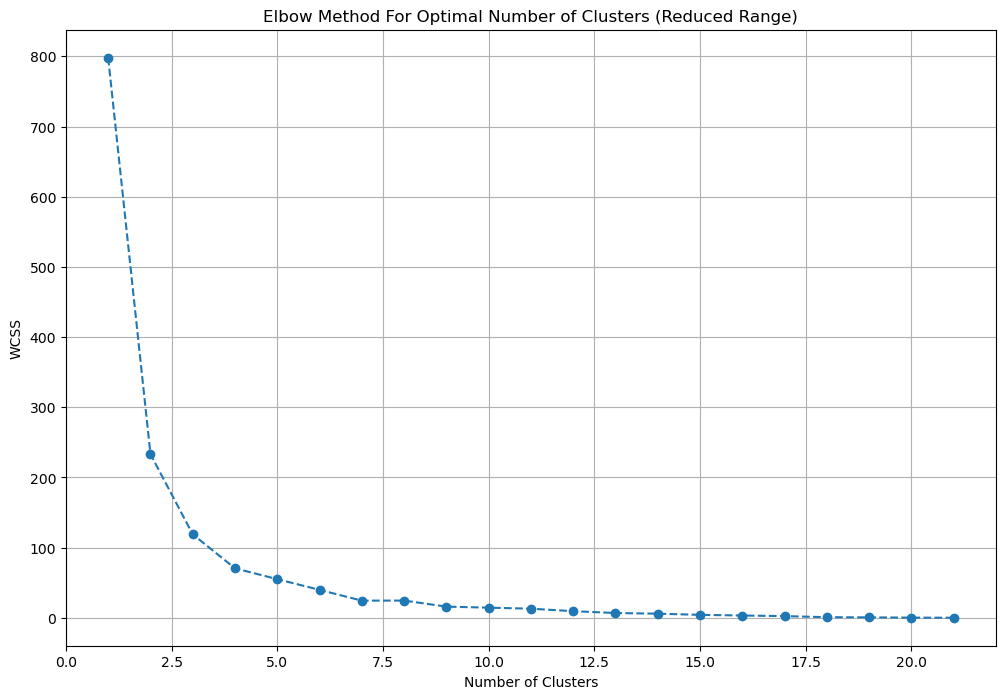

In [127]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,22), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [128]:
#there are multiple breaks in the slope so there is no clear cut definition of how many categories should be formed but i still try to divide it in 3 categories.
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [129]:
df["quality_type"]=cluster_assignments

In [130]:
category_mapping={0:"medium",1:"low",2:"high"}
df["quality_type"]=df["quality_type"].replace(category_mapping)
df.sample(5)[["ratings","quality_type"]]

,ratings,quality_type
923,4.50,medium
930,4.25,low
334,4.60,high
1000,4.55,high
94,4.75,high


## Conclusion
- I covert this numerical column to a categorical column using k-means clustering 


# 5.Thickness

In [131]:
df["thickness"].describe()

count    798.000000
mean      20.523308
std       37.079864
min        0.000000
25%       12.912500
50%       18.400000
75%       20.000000
max      376.170000
Name: thickness, dtype: float64

In [132]:
df["thickness"]=df["thickness"].replace(0,np.nan)

In [313]:
px.histogram(df,x="thickness")

In [285]:
px.box(df,x="thickness")
#px.violin(df,x="thickness")

In [284]:
#Here we convert some values that i thought are in inches and given into mm.
df.loc[df["thickness"] < 9, "thickness"] *= 25.4

In [321]:
#On the basis of histogram i think we can divide this in 3 categories
#0->slim[<18]
#1->medium[18-22]
#2->thick[>22]
# Define the thresholds
slim_threshold = 18
medium_threshold = 22

# Create a new column to store the popularity level
df['thickness'] = pd.cut(df['thickness'], bins=[-1, slim_threshold, medium_threshold, float('inf')], labels=['slim', 'medium', 'thick'])


In [324]:
thickness_counts=df["thickness"].value_counts()

In [325]:
px.pie(values=thickness_counts.values,names=thickness_counts.index,title="Thickness Pie Chart")

In [135]:
df["thickness"].isnull().sum()

185

## Conclusion
- 185 rows are null
- There are 5 values that are less than 3 mm so most probably the thickness is given in inches,so we are going to convert it into inches.
- I think there are 18 outliers present in the column
- we can convert this column into category column where categories are -"slim", "medium", "thick"
- After coverting we see that all three categories are sharing equal amount of laptops

# 6.Weight

In [293]:
df["weight"].isnull().sum()

67

In [299]:
px.histogram(df,x="weight")

In [311]:
#On the basis of histogram i think we can divide this in 3 categories
#0->lite[<1.5]
#1->medium[1.5-2]
#2->heavy[>2]
# Define the thresholds
lite_threshold = 1.5
medium_threshold = 2

# Create a new column to store the popularity level
df['weight'] = pd.cut(df['weight'], bins=[-1, lite_threshold, medium_threshold, float('inf')], labels=['lite', 'medium', 'heavy'])


In [326]:
weight_count=df["weight"].value_counts()

In [328]:
px.pie(values=weight_count.values,names=weight_count.index,title="Weight Pie Chart")

## Conclusion
- 67 values are null
- We can convert this column into category column where the categories are - "lite", "medium", "heavy"
- After categorization we see that 50% laptops are medium and lite and heavy share eqaul number of laptops
- we select the threshold value as 1.5 and 2

# 7.Warranty

In [136]:
df["warranty"].isnull().sum()

5

In [137]:
df["warranty"].value_counts()

warranty
1.0    700
2.0     84
3.0      9
Name: count, dtype: int64

## Conclusion
- There are 5 null values, i try to fill it manually or by assigning what number comes maximum times.
- Here i see that maximum number of rows have same values and also this column doesn't provide much information , so the best decision is to remove this column

# 8.Screen Size

In [138]:
df["screen_size"].value_counts()

screen_size
15.60    416
14.00    195
16.00    100
13.30     21
16.10     17
17.30     14
17.00      7
11.60      6
14.10      5
13.40      4
18.00      2
14.50      2
14.20      2
13.00      1
13.50      1
16.20      1
13.60      1
15.30      1
15.56      1
15.00      1
Name: count, dtype: int64

In [139]:
df["screen_size"]=df["screen_size"].astype("int")

In [140]:
df["screen_size"].value_counts()

screen_size
15    419
14    204
16    118
13     28
17     21
11      6
18      2
Name: count, dtype: int64

In [141]:
px.histogram(df,x="screen_size")

## Conclusion
- Screen sizes are in decimals so i convert this column into integers so that it is easy to ask the users what they want
- Maximum number of laptops have 15" screen size

# 9.Resolution width and resolution height
- We make a seprate column based on it named ppi
- So we are going to proceed our analysis on that column 

# 10.PPI

In [142]:
ppi_fig=make_subplots(rows=2,cols=1)
ppi_fig.add_trace(
    go.Histogram(x=df["ppi"],nbinsx=100),
    row=1,col=1
)
ppi_fig.add_trace(
    go.Violin(x=df["ppi"]),
    row=2,col=1
)
ppi_fig.update_layout(title="PPI Subplots")
ppi_fig.show()

In [146]:
#Here we see that k-means clustering doesn't give us appropriate results so by looking data we decide to divide this into three category
#100-140->low
#140-144->medium
#more than 144 ->high
low_threshold=139
medium_threshold=145
df["ppi_type"]=pd.cut(df["ppi"],bins=[-1,low_threshold,medium_threshold,float("inf")],labels=["low","medium","high"])


In [147]:
df["ppi_type"].value_counts()

ppi_type
medium    413
high      312
low        73
Name: count, dtype: int64

## Conclusion
- ppi ranges from 100-323
- maximum number of laptops have ppi between 140 and 144
- k-means clustering didn't show clear cut values
- we make a new column named "ppi_type" and insert all values as low,medium and high

# 11.Threads

In [148]:
df["threads"].value_counts()

threads
12.0    284
16.0    191
8.0     143
20.0     58
4.0      48
2.0      27
32.0     13
24.0     10
6.0       3
Name: count, dtype: int64

In [149]:
df["cores"].value_counts()

cores
6.0     156
8.0     149
10.0    145
4.0      95
12.0     88
2.0      71
14.0     63
24.0     13
16.0     11
5.0       3
Name: count, dtype: int64

# 11.Ram

In [150]:
df["ram"].value_counts()

ram
16    431
8     298
32     45
4      20
64      3
12      1
Name: count, dtype: int64

In [151]:
ram_fig=make_subplots(rows=2,cols=1)
ram_fig.add_trace(
    go.Histogram(x=df["ram"]),
    row=1,col=1
)
ram_fig.add_trace(
    go.Violin(x=df["ram"]),
    row=2,col=1
)
ram_fig.update_layout(title="Ram Subplot")
ram_fig.show()

## Conclusion
- Maximum number of laptops have 16gb of ram and than 8gb ram 

# 12.Aspect Ratio

In [152]:
px.histogram(df,x="aspect_ratio")

In [153]:
#Here we replace 0 with null values
df["aspect_ratio"]=df["aspect_ratio"].replace("0",np.nan)

In [154]:
df["aspect_ratio"].isnull().sum()

403

## Conclusions
- In this there are 50% values are null
- I don't think that this column is usefull beacause 50% values are null and the importance of this column is not significant according to our model .

# 13.Cores

In [195]:
df.columns

Index(['laptop_model', 'brand', 'price', 'num_votes', 'ratings', 'thickness',
       'weight', 'warranty', 'screen_size', 'resolution_width',
       'resolution_height', 'ppi', 'threads', 'ram', 'antiglare',
       'aspect_ratio', 'touch_screen', 'cores', 'battery_capacity',
       'battery_cell', 'hdmi', 'ethernet', 'multi_card_reader', 'thunderbolt',
       'display_port', 'vga', 'backlit', 'fingerprint_sensor',
       'inbuilt_microphone', 'usb2', 'usb3', 'typec', 'processor_gen',
       'processor_brand', 'processor_model', 'graphics_brand',
       'graphics_capacity', 'graphics_model', 'everyday_use', 'business',
       'performance', 'gaming', 'hdd', 'ssd', 'votes_type', 'popularity',
       'quality_type', 'ppi_type'],
      dtype='object')

# 14.Battery Capacity and Battery Cell

In [197]:
print(df["battery_capacity"].isnull().sum())
print(df["battery_cell"].isnull().sum())

202
159


In [240]:
bc_fig=make_subplots(rows=2,cols=1)
bc_fig.add_trace(
    go.Histogram(x=df["battery_capacity"]),
    row=1,col=1
)
bc_fig.add_trace(
    go.Box(x=df["battery_capacity"]),
    row=2,col=1
)

In [229]:
df[(df["battery_capacity"]>40) & (df["battery_capacity"]<65)].shape[0]/798*100

50.0

In [234]:
df[df["battery_capacity"]==6]

,laptop_model,brand,price,num_votes,ratings,thickness,weight,warranty,screen_size,resolution_width,resolution_height,ppi,threads,ram,antiglare,aspect_ratio,touch_screen,cores,battery_capacity,battery_cell,hdmi,ethernet,multi_card_reader,thunderbolt,display_port,vga,backlit,fingerprint_sensor,inbuilt_microphone,usb2,usb3,typec,processor_gen,processor_brand,processor_model,graphics_brand,graphics_capacity,graphics_model,everyday_use,business,performance,gaming,hdd,ssd,votes_type,popularity,quality_type,ppi_type
173,Xiaomi Redmi Book 14 2023 Laptop (12th Gen Core i5/ 16GB/ 512GB SSD/ Win 11),Xiaomi,43990,77.0,4.7,NaN,NaN,1.0,14,2880.0,1800.0,243,16.0,8,1,NaN,0,12.0,6.0,NaN,1,0,0,1,0,0,1,0,1,1.0,2.0,1.0,12.0,intel,i5,intel,NaN,Integrated,0,1,0,0,NaN,512.0,0,regular,high,high


In [247]:
bc_counts=df["battery_cell"].value_counts()
px.pie(values=bc_counts.values,names=bc_counts.index,title="Battery Cell Pie Chart")

## Conclusion
1. **Battery Capacity**
- 50% laptops battery ranges from 40Wh to 65Wh
- maximum capacity is 100Wh
- minimum is 6Wh and i cross check it and found out that data is correct
- There are 202 null values present in this column
2. **Battery Cell**
- There 159 columns are null in this column
- 65% batteries have 3 cells than 25% have 4 cells, 44 laptops have 6 cell and 28 laptops have 2 cell.

# 15.Some Categorical Columns

In [159]:
#usb2 , usb3 and typec have null values now we are going to fill them with 0. which shows that these features are not present in that laptop
df["usb2"]=df["usb2"].replace(np.nan,0)
df["usb3"]=df["usb3"].replace(np.nan,0)
df["typec"]=df["typec"].replace(np.nan,0)

In [160]:
#These are the list of some categorical columns
categorical=["antiglare","touch_screen","hdmi","ethernet","multi_card_reader","thunderbolt","display_port","vga","backlit","fingerprint_sensor","inbuilt_microphone","usb2","usb3","typec","everyday_use","business","performance","gaming"]

In [161]:
#Now we are going to use the "categorical" list to make subplots in a single go for all these columns.
#First of all we check how much columns are there
print(len(categorical))

18


In [162]:
# Create subplots for pie charts
cat_fig = make_subplots(rows=6, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}],[{'type':'domain'}, {'type':'domain'},{'type':'domain'}],[{'type':'domain'}, {'type':'domain'},{'type':'domain'}],[{'type':'domain'}, {'type':'domain'},{'type':'domain'}],[{'type':'domain'}, {'type':'domain'},{'type':'domain'}],[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]])

row_num = 1
col_num = 1

for i in categorical:
    counts = df[i].value_counts()
    pie_chart = go.Pie(labels=counts.index, values=counts.values,title="{} Pie Chart".format(i))
    cat_fig.add_trace(pie_chart, row=row_num, col=col_num)
    if col_num < 3:
        col_num += 1
    else:
        row_num += 1
        col_num = 1

cat_fig.update_layout(height=2000, width=2000, title_text="Categorical Column Pie Charts")
cat_fig.show()


In [194]:
df[df["display_port"]==1]
df[df["vga"]==1]
df[df["inbuilt_microphone"]==0]

,laptop_model,brand,price,num_votes,ratings,thickness,weight,warranty,screen_size,resolution_width,resolution_height,ppi,threads,ram,antiglare,aspect_ratio,touch_screen,cores,battery_capacity,battery_cell,hdmi,ethernet,multi_card_reader,thunderbolt,display_port,vga,backlit,fingerprint_sensor,inbuilt_microphone,usb2,usb3,typec,processor_gen,processor_brand,processor_model,graphics_brand,graphics_capacity,graphics_model,everyday_use,business,performance,gaming,hdd,ssd,votes_type,popularity,quality_type,ppi_type
187,Acer Extensa 15 EX215-33 2023 Laptop (Intel Core i3 N305/ 8GB/ 512GB SSD/ Win11 Home),Acer,32990,1170.0,4.15,18.9,1.70,1.0,15,1920.0,1080.0,141,8.0,8,1,NaN,0,8.0,40.0,3.0,1,1,0,0,0,0,0,0,0,0.0,2.0,1.0,NaN,intel,i3,intel,NaN,Integrated,1,0,0,0,NaN,512.0,0,popular,low,medium
215,HP Pavilion 15-eg3027TU Laptop (13th Gen Core i5/ 16GB/ 512GB SSD/ Win11 Home),HP,66150,87.0,4.40,17.9,1.74,1.0,15,1920.0,1080.0,141,16.0,16,1,NaN,0,12.0,41.0,NaN,1,0,0,0,0,0,1,0,0,0.0,2.0,1.0,13.0,intel,i5,intel,NaN,Integrated,0,0,1,0,NaN,512.0,0,regular,medium,medium
245,Acer Extensa 15 EX215-33 Laptop (Intel Core i3 N305/ 8GB/ 256GB SSD/ Win11 Home),Acer,30990,1075.0,4.10,18.9,1.70,1.0,15,1920.0,1080.0,141,8.0,8,1,NaN,0,8.0,40.0,3.0,1,1,0,0,0,0,0,0,0,0.0,2.0,1.0,NaN,intel,i3,intel,NaN,Integrated,1,0,0,0,NaN,256.0,0,popular,low,medium
339,HP Pavilion 15-eg3018TU Laptop (13th Gen Core i5/ 16GB/ 1TB SSD/ Win11 Home),HP,73990,83.0,4.30,17.9,1.74,1.0,15,1920.0,1080.0,141,12.0,16,1,NaN,0,10.0,41.0,3.0,1,0,0,0,0,0,1,0,0,0.0,2.0,1.0,13.0,intel,i5,intel,NaN,Integrated,0,0,1,0,NaN,1024.0,0,regular,medium,medium
366,Asus Chromebook CX1400FKA-EC0158 Laptop (Celeron N4500/ 4GB/ 64GB eMMC/ Chrome OS),Asus,20990,59.0,4.10,18.6,1.63,1.0,14,1920.0,1080.0,157,2.0,4,1,NaN,1,2.0,50.0,3.0,0,0,0,0,0,0,0,0,0,0.0,2.0,2.0,NaN,intel,5,intel,NaN,Integrated,0,0,1,0,NaN,64.0,0,regular,low,high
409,Lenovo IdeaPad Gaming 3i 82K101GTIN Laptop (11th Gen Core i5/ 8 GB RAM/ 512 GB SSD/ Win 11/ 4 GB Graphics),Lenovo,58850,79.0,4.50,NaN,2.20,1.0,15,1920.0,1080.0,141,8.0,8,1,16:9,0,4.0,45.0,3.0,1,1,0,0,0,0,1,0,0,0.0,0.0,1.0,11.0,intel,i5,nvidia,4.0,gtx1650,0,0,0,1,NaN,512.0,0,regular,medium,medium
428,HP Pavilion 15-eg3017TU Laptop (13th Gen Core i5/ 16GB/ 1TB SSD/ Win11 Home),HP,74990,84.0,4.70,17.9,1.74,1.0,15,1920.0,1080.0,141,12.0,16,1,NaN,0,10.0,41.0,3.0,1,0,0,0,0,0,1,0,0,0.0,2.0,1.0,13.0,intel,i5,intel,NaN,Integrated,0,0,1,0,NaN,1024.0,0,regular,high,medium
634,HP Pavilion 15-eg3079TU Laptop (13th Gen Core i5/ 16GB/ 512GB SSD/ Win11 Pro),HP,72999,165.0,4.15,17.9,1.75,1.0,15,1920.0,1080.0,141,16.0,16,1,NaN,0,12.0,NaN,NaN,1,0,0,0,0,0,1,0,0,0.0,2.0,1.0,13.0,intel,i5,intel,NaN,Integrated,0,0,1,0,NaN,512.0,0,regular,low,medium
676,Acer Aspire 7 A715-76G NH.QMFSI.003 Gaming Laptop (12th Gen Core i5/ 8GB/ 512GB SSD/ Win11 Home/ 4GB Graph),Acer,57990,91.0,4.55,NaN,2.10,1.0,15,1920.0,1080.0,141,12.0,8,0,NaN,0,8.0,NaN,3.0,1,1,0,0,0,0,1,1,0,0.0,3.0,1.0,12.0,intel,i5,nvidia,4.0,Integrated,0,0,1,0,NaN,512.0,0,regular,high,medium
918,Acer Aspire 5 A515-58M NX.KHGSI.002 Gaming Laptop (13th Gen Core i5/ 16GB/ 512GB SSD/ Win11 Home),Acer,58990,65.0,4.25,NaN,1.75,1.0,15,1920.0,1080.0,141,12.0,16,0,NaN,0,10.0,50.0,3.0,1,0,0,0,0,0,1,0,0,0.0,2.0,1.0,13.0,intel,i5,intel,NaN,Integrated,0,0,1,0,NaN,512.0,0,regular,low,medium


## Conclusion
1. **Antiglare**-85% laptops provide antiglare screen
2. **Touchscreen**-out of 798 laptops only 66 laptops have touchscreen
3. **HDMI**-95% laptops have hdmi port
4. **Ethernet**-43% laptops have
5. **Multi Card Reader**-30% laptops
6. **Thunderbolt**-27.4% laptops have
7. **Display Port**-only 15 laptops have 
8. **VGA port**-only two laptops have
9. **Backlight**-80% laptops have
10. **Fingerprint Sensor**-31% laptops have
11. **Inbuilt Microphone**-only 10 laptops doesn't have inbuilt microphone
12. **USB2.0**-In 70.3% laptops usb2 is not present , In 24.4% laptops 1 port is available and in remaining two ports are available
13. **USB3.0**-Suprisingly in 57% laptops two usb3 ports are available , in 22.7% laptops one usb3 port is available , in 13.9% laptops three ports are available remaining laptops have no ports.
14. **typec**-simultaneously 63%,28.3% ,2.38% and 0.376% laptops have one ,two, three and four ports remaining doesn't have typec
15. laptops are also divided on the basis of usage so, 26% laptops are for everyday use, 8% laptops are for bussiness use,44% are for performance and 21.7% are for gaming, these are not aggregated these are individual shares same laptops comes in one category some in two and so on.

# 16. Processor Genration

In [163]:
df["processor_gen"].value_counts()

processor_gen
12.0    215
13.0    212
11.0    109
7.0      97
5.0      75
6.0      14
3.0      14
10.0     11
4.0       4
8.0       3
9.0       1
Name: count, dtype: int64

In [164]:
df["processor_gen"].isnull().sum()

43

In [165]:
df[df["processor_gen"].isnull()]

,laptop_model,brand,price,num_votes,ratings,thickness,weight,warranty,screen_size,resolution_width,resolution_height,ppi,threads,ram,antiglare,aspect_ratio,touch_screen,cores,battery_capacity,battery_cell,hdmi,ethernet,multi_card_reader,thunderbolt,display_port,vga,backlit,fingerprint_sensor,inbuilt_microphone,usb2,usb3,typec,processor_gen,processor_brand,processor_model,graphics_brand,graphics_capacity,graphics_model,everyday_use,business,performance,gaming,hdd,ssd,votes_type,popularity,quality_type,ppi_type
10,Apple MacBook Air 2020 MGND3HN Laptop (Apple M1/ 8GB/ 256GB/ MacOS),Apple,69990,14846.0,4.70,16.10,1.29,1.0,13,2560.0,1600.0,227,NaN,8,0,NaN,0,8.0,49.9,NaN,0,0,0,1,0,0,1,0,1,0.0,2.0,2.0,NaN,apple,M1,apple,NaN,Integrated,0,0,1,0,NaN,256.0,1,viral,high,high
40,HP 247 G8 67U77PA Laptop (Athlon P-3045B HD/ 8GB/ 1TB HDD/ Win11),HP,22980,1043.0,3.55,19.90,1.47,1.0,14,1366.0,768.0,112,NaN,8,1,NaN,0,NaN,NaN,NaN,1,1,1,0,0,0,0,0,1,0.0,2.0,1.0,NaN,amd,3,amd,NaN,Integrated,1,0,0,0,1024.0,0.0,0,popular,low,low
52,Lenovo E41-55 Laptop (Athlon Pro 3045B/ 8GB/ 256 SSD/ Win11),Lenovo,18990,60.0,4.20,NaN,1.80,1.0,14,1920.0,1080.0,157,2.0,8,1,NaN,0,2.0,NaN,NaN,1,0,1,0,0,0,0,0,1,1.0,1.0,1.0,NaN,amd,3,amd,NaN,Integrated,1,0,0,0,NaN,256.0,0,regular,low,high
64,Primebook 4G Android Laptop (MediaTek Kompanio 500/ 4GB/ 64GB eMMC/ Android 11),Primebook,11990,1923.0,4.20,19.30,1.20,1.0,11,1366.0,768.0,135,NaN,4,0,NaN,0,8.0,NaN,NaN,0,0,0,0,0,0,0,0,1,0.0,2.0,0.0,NaN,mediatek,7,arm,NaN,Integrated,1,0,0,0,64.0,0.0,2,popular,low,low
76,Walker NU14A1 Laptop (Celeron N4020/ 4GB/ 128GB SSD / Win11 Home),Walker,13990,151.0,4.20,NaN,NaN,1.0,14,1920.0,1080.0,156,2.0,4,1,16:9,0,2.0,18.5,2.0,1,0,0,0,0,0,0,0,1,1.0,1.0,0.0,NaN,intel,7,intel,NaN,Integrated,0,0,1,0,NaN,256.0,0,regular,low,high
78,Lenovo IdeaPad 1 15AMN7 82VG00EQIN Laptop (AMD Athlon 7120U / 8GB/ 512GB SSD/ Win11 Home),Lenovo,23990,94.0,4.65,17.90,1.58,1.0,15,1366.0,768.0,100,2.0,8,1,NaN,0,2.0,NaN,NaN,1,0,1,0,0,0,1,0,1,1.0,1.0,1.0,NaN,amd,7,amd,NaN,Integrated,0,0,1,0,NaN,512.0,0,regular,high,low
85,Apple MacBook Air 15 2023 Laptop (Apple M2/ 8GB/ 256GB/ MacOS),Apple,126990,109.0,4.45,11.50,1.51,1.0,15,2880.0,1864.0,224,NaN,8,0,NaN,0,8.0,66.5,NaN,0,0,0,1,1,0,1,1,1,0.0,0.0,2.0,NaN,apple,M2,apple,NaN,Integrated,0,0,1,0,NaN,256.0,0,regular,medium,high
127,Apple MacBook Pro 16 inch Laptop (M2 Max 12-core CPU/ 32GB/ 1TB SSD/ Mac OS/ 38-core GPU),Apple,322490,87.0,4.50,16.80,2.16,1.0,16,3456.0,2234.0,254,NaN,32,1,NaN,0,12.0,100.0,NaN,1,0,1,1,1,0,1,0,1,0.0,0.0,3.0,NaN,apple,M2,apple,NaN,Integrated,0,0,1,0,NaN,1024.0,0,regular,medium,high
134,Apple MacBook Air 2022 Laptop (Apple M2/ 8GB/ 256GB/ MacOS),Apple,94990,823.0,4.65,11.30,1.24,1.0,13,2560.0,1664.0,224,NaN,8,0,NaN,0,8.0,52.6,NaN,0,0,0,1,1,0,1,0,1,0.0,0.0,2.0,NaN,apple,M2,apple,NaN,Integrated,0,0,1,0,NaN,256.0,0,popular,high,high
136,Asus CX1101CMA-GJ0007 Chromebook (Celeron Dual Core/ 4GB/ 64GB eMMC/ Chrome OS),Asus,11990,673.0,3.70,1.95,1.24,1.0,11,1366.0,768.0,135,2.0,4,1,NaN,0,2.0,NaN,3.0,0,0,1,0,0,0,0,0,1,0.0,2.0,2.0,NaN,intel,7,intel,NaN,Integrated,0,0,1,0,64.0,0.0,0,popular,low,low


In [166]:
gen_counts=df["processor_gen"].value_counts()
px.pie(names=gen_counts.index,values=gen_counts.values,title="Processor Generation Pie Chart")

## Conclusion
- There are 43 missing values
- More than 55% laptops have 12th and 13th gen processors

# 17.Processor Brand

In [167]:
pb_counts=df["processor_brand"].value_counts()
px.pie(values=pb_counts.values,names=pb_counts.index,title="Processor Brand Pie Chart")

In [168]:
df["processor_brand"].isnull().sum()

0

## Conclusion
- 73% laptops have intel processors.
- 26% laptops have amd ,8 laptops have apple and onl 2 have mediatek

# 18.Processor Model

In [169]:
df["processor_model"].isnull().sum()

0

In [170]:
pm_counts=df["processor_model"].value_counts()
px.pie(values=pm_counts.values,names=pm_counts.index,title="Processor Model Pie Chart")

## Conclusion
- Max no of laptops have i5 model
- All the models have "i" in starting are belong to the intel , m1,m2 belong to the apple and only numbers belong to amd.

# 19.Graphic Brand

In [171]:
gb_counts=df["graphics_brand"].value_counts()

In [172]:
df["graphics_brand"].isnull().sum() #There is one null value in this column.
df[df["graphics_brand"].isnull()] # After checking the null value it shows that graphic model is integrated so the brand should be intel
#so we are going to fill it with intel
df["graphics_brand"].iloc[200]="intel"

C:\Users\harsh\AppData\Local\Temp\ipykernel_15392\322097861.py:4: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\harsh\AppData\Local\Temp\ipykernel_15392\322097861.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy

In [173]:
px.pie(values=gb_counts.values,names=gb_counts.index,title="Graphic Brand Pie Chart")

## Conclusion
- Maximum number of laptops have intel graphic card.
- After that nvidia and then amd

# 20.Graphic Capacity

In [174]:
gc_counts=df["graphics_capacity"].value_counts()

In [175]:
df["graphics_capacity"].isnull().sum()

478

In [176]:
px.pie(values=gc_counts.values,names=gc_counts.index,title="Graphic Capacity Pie Chart")

## Conclusion
- More than 59% values are null.
- Out of the data that are present approx 50% have 4gb capacity.


# 21.Graphics Model

In [177]:
gm_counts=df["graphics_model"].value_counts()
gm_counts

graphics_model
Integrated    490
rtx3050        86
rtx4050        44
rtx4060        43
rtx2050        37
gtx1650        24
rtx4070        19
rtx4080         7
rx6500m         7
rtx4090         7
rtx3060         7
rtx3070ti       5
mx450           5
t600            4
t550            3
rtx3080ti       2
mx570           1
rx5600m         1
rx7600s         1
mx130           1
gtx2050         1
rtx2060         1
mx550           1
t500            1
Name: count, dtype: int64

In [178]:
df["graphics_model"].isnull().sum()

0

In [256]:
px.pie(values=gm_counts.head(7).values,names=gm_counts.head(7).index,title="Graphic Model Pie Chart")

## Conclusion
- In more than 60% laptops there are integrated graphics.
- Too many categories are present (High Cardinality)

# 22.Hard Disk

In [180]:
df["hdd"].value_counts()

hdd
1024.0    15
64.0       2
128.0      1
32.0       1
Name: count, dtype: int64

In [181]:
df["hdd"].isnull().sum()

779

## Conclusion
- Only 19 values are there remaining all are null.[High Nullity]
- out of 19 laptops 15 laptops have 1tb storage.

# 23.Solid State Drive

In [182]:
df["ssd"].isnull().sum()

0

In [183]:
ssd_counts=df["ssd"].value_counts()

In [184]:
px.pie(values=ssd_counts.values,names=ssd_counts.index,title="SSD Pie Chart")

In [185]:
df[df["ssd"]==4096]

,laptop_model,brand,price,num_votes,ratings,thickness,weight,warranty,screen_size,resolution_width,resolution_height,ppi,threads,ram,antiglare,aspect_ratio,touch_screen,cores,battery_capacity,battery_cell,hdmi,ethernet,multi_card_reader,thunderbolt,display_port,vga,backlit,fingerprint_sensor,inbuilt_microphone,usb2,usb3,typec,processor_gen,processor_brand,processor_model,graphics_brand,graphics_capacity,graphics_model,everyday_use,business,performance,gaming,hdd,ssd,votes_type,popularity,quality_type,ppi_type
124,MSI Titan GT77 HX 13VI-092IN Gaming Laptop (13th Gen Core i9/ 64GB/ 4TB SSD/ Win11 Home/ 16GB Graph),MSI,569990,83.0,4.1,23.0,3.3,2.0,17,3840.0,2160.0,255,32.0,64,1,NaN,0,24.0,99.0,4.0,1,1,1,0,1,0,1,1,1,0.0,3.0,2.0,13.0,intel,i9,nvidia,16.0,rtx4090,0,0,0,1,NaN,4096.0,0,regular,low,high


## Conclusion
- Almost 71% laptops have 512gb ssd.
- one laptop have 4gb ssd after checking it seems justifiable because the price of laptop is approx. 6 lacs
- Almost 20% laptops have 1tb ssd.

In [186]:
df.columns

Index(['laptop_model', 'brand', 'price', 'num_votes', 'ratings', 'thickness',
       'weight', 'warranty', 'screen_size', 'resolution_width',
       'resolution_height', 'ppi', 'threads', 'ram', 'antiglare',
       'aspect_ratio', 'touch_screen', 'cores', 'battery_capacity',
       'battery_cell', 'hdmi', 'ethernet', 'multi_card_reader', 'thunderbolt',
       'display_port', 'vga', 'backlit', 'fingerprint_sensor',
       'inbuilt_microphone', 'usb2', 'usb3', 'typec', 'processor_gen',
       'processor_brand', 'processor_model', 'graphics_brand',
       'graphics_capacity', 'graphics_model', 'everyday_use', 'business',
       'performance', 'gaming', 'hdd', 'ssd', 'votes_type', 'popularity',
       'quality_type', 'ppi_type'],
      dtype='object')

In [331]:
final_conclusion={
    "Columns":['laptop_model','brand','price','num_votes', 'ratings', 'thickness',
       'weight', 'warranty', 'screen_size', 'resolution_width',
       'resolution_height', 'ppi', 'threads', 'ram', 'antiglare',
       'aspect_ratio', 'touch_screen', 'cores', 'battery_capacity',
       'battery_cell', 'hdmi', 'ethernet', 'multi_card_reader', 'thunderbolt',
       'display_port', 'vga', 'backlit', 'fingerprint_sensor',
       'inbuilt_microphone', 'usb2', 'usb3', 'typec', 'processor_gen',
       'processor_brand', 'processor_model', 'graphics_brand',
       'graphics_capacity', 'graphics_model', 'everyday_use', 'business',
       'performance', 'gaming', 'hdd', 'ssd', 'votes_type', 'popularity',
       'quality_type', 'ppi_type'],
    "Action":["Remove","Keep","Keep","Remove","Remove","Keep",
              "Keep","Remove","Keep","Remove",
              "Remove","Keep","Keep","Keep","keep",
              "Remove","Keep","keep","Keep",
              "Keep","Keep","Keep","Keep","Keep",
              "Keep","Keep","Keep","Keep",
              "Remove","Keep","Keep","Keep","Keep",
              "Keep","Keep","Keep",
              "Keep","Keep","Keep","Keep",
              "Keep","Keep","Keep","Keep","Remove","Keep",
              "Keep","Keep"
             ],
    "Remarks":[
        "we are going to remove it right now but going to keep it for further use",np.nan,np.nan,"formed a new column from this so going to delete it.","formed a new column from this so going to delete it.",'we can convert this column into category column where categories are -"slim", "medium", "thick"',
        'we can convert this column into category column where categories are -"lite", "medium", "heavy"',"Remove it no use for analysis or model building ",np.nan,"formed a new column from this so going to delete it.",
        "formed a new column from this so going to delete it.",np.nan,np.nan,np.nan,np.nan,
        "No use for analysis and model building",np.nan,np.nan,np.nan,
        np.nan,np.nan,np.nan,np.nan,np.nan,
        np.nan,np.nan,np.nan,np.nan,
        "No use because every laptop have it",np.nan,np.nan,np.nan,np.nan,
        np.nan,np.nan,np.nan,
        np.nan,np.nan,np.nan,np.nan,
        np.nan,np.nan,np.nan,np.nan,"No use because we make a new column named popularity",np.nan,
        np.nan,np.nan
    ]
    
}

In [332]:
final_conclusion_df=pd.DataFrame(final_conclusion)
print(final_conclusion_df)

               Columns  Action  \
0         laptop_model  Remove   
1                brand    Keep   
2                price    Keep   
3            num_votes  Remove   
4              ratings  Remove   
5            thickness    Keep   
6               weight    Keep   
7             warranty  Remove   
8          screen_size    Keep   
9     resolution_width  Remove   
10   resolution_height  Remove   
11                 ppi    Keep   
12             threads    Keep   
13                 ram    Keep   
14           antiglare    keep   
15        aspect_ratio  Remove   
16        touch_screen    Keep   
17               cores    keep   
18    battery_capacity    Keep   
19        battery_cell    Keep   
20                hdmi    Keep   
21            ethernet    Keep   
22   multi_card_reader    Keep   
23         thunderbolt    Keep   
24        display_port    Keep   
25                 vga    Keep   
26             backlit    Keep   
27  fingerprint_sensor    Keep   
28  inbuilt_mi

In [337]:
df.drop(["laptop_model","num_votes","ratings","warranty","resolution_width","resolution_height","aspect_ratio","inbuilt_microphone","votes_type"],axis=1,inplace=True)

In [339]:
df.shape

(798, 39)

In [340]:
df.to_csv("after_univariate.csv")